**Purpose of this this notebook:** EDA + Clean data of three files.

In [2]:
#Mount my Google Drive.
from google.colab import drive
drive.mount("/content/drive")
import os
directory = '/content/drive/My Drive/DSC 672'
os.chdir(directory)

#Ensure the files are there (in the folder).
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC 672


In [4]:
import pandas as pd
import numpy as np

#For text processing.
!pip install -q nltk
!pip install -q fast-langdetect
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q folium
import string
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from fast_langdetect import detect

#For geospatial map.
!pip install -q geopandas
!pip install -q pyproj
!pip install -q contextily
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import contextily as ctx
from collections import Counter
import ast
%matplotlib inline

#For warnings.
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Listings Dataset**

In [ ]:
listings = pd.read_csv("listings_big.csv")
print (f"Listings dataset shape: {listings.shape}")

Listings dataset shape: (7952, 75)


## **Apply weight decay on reviews count --> Consider time factor.**

In [ ]:
def get_general_reviewsCount(row):
  '''Function to apply the time weight decay or use rounded-up number_of_reviews.'''

  #Apply time decay: Before 12 months: 0.8 | Last 12 months: 0.9 | Last 30 days: 1.0
  reviewsCount = (row['number_of_reviews'] * 0.8 +
                  row['number_of_reviews_ltm'] * 0.9 +
                  row['number_of_reviews_l30d'] * 1.0)
  #So we don't pump up reviews count.
  if reviewsCount > row['number_of_reviews']:
    reviewsCount = row['number_of_reviews']
  return int(np.ceil(reviewsCount))  #Round up the result.

#Apply the function to calculate overall reviews count of each listing.
listings['reviews_count'] = listings.apply(get_general_reviewsCount, axis=1)

## **Merge 'name' and 'description'. Convert data type for price.**

In [ ]:
listings['name'] = listings['name'].astype(str)
listings['description'] = listings['description'].astype(str)
listings['neighborhood_overview'] = listings['neighborhood_overview'].astype(str)
listings['name_description'] = listings['name'] + ' ' + listings['description'] + ' ' + listings['neighborhood_overview']
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
#Get name and data type of each column.
pd.set_option('display.max_columns', None)
listings.dtypes

,0
id,int64
listing_url,object
scrape_id,float64
last_scraped,object
source,object
...,...
calculated_host_listings_count_private_rooms,int64
calculated_host_listings_count_shared_rooms,int64
reviews_per_month,float64
reviews_count,int64


## **Get the host_id with the highest count.**

In [ ]:
master_hostID = listings['host_id'].value_counts().idxmax()
countMaster_hostID = listings['host_id'].value_counts().max()
print(f"Host ID with the highest count: {master_hostID}")
print(f"Count: {countMaster_hostID}")

Host ID with the highest count: 107434423
Count: 549


## **Get the neighborhood with the highest count.**

In [ ]:
masterNeighbourhood = listings['neighbourhood_cleansed'].value_counts().idxmax()
countMaster_neighbourhood = listings['neighbourhood_cleansed'].value_counts().max()
print(f"Neighbourhood with the highest count: {masterNeighbourhood}")
print(f"Count: {countMaster_neighbourhood}")

Neighbourhood with the highest count: Near North Side
Count: 913


## **Clean Listings dataset.**

In [ ]:
#Drop unnecessary columns. 1st round: Scrape related.
listings = listings.drop(columns=['scrape_id', 'last_scraped', 'source', 'calendar_last_scraped', 'calculated_host_listings_count',
                                  'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                  'calculated_host_listings_count_shared_rooms'])
print (f" Listings dataset shape: {listings.shape}")

 Listings dataset shape: (7952, 69)


In [ ]:
#Drop unnecessary columns. 2nd round: URLs.
listings = listings.drop(columns=['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'])
print (f" Listings dataset shape: {listings.shape}")

 Listings dataset shape: (7952, 64)


In [ ]:
#Drop unnecessary columns. 3rd round: Host related.
listings = listings.drop(columns=['host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                  'host_about', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_total_listings_count', 'host_listings_count'])
print (f" Listings dataset shape: {listings.shape}")

 Listings dataset shape: (7952, 51)


In [ ]:
#Drop unnecessary columns. 4th round: Listing related.
listings = listings.drop(columns=['neighbourhood', 'neighbourhood_group_cleansed', 'property_type', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                  'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                                  'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'license', 'instant_bookable'])
print (f" Listings dataset shape: {listings.shape}")

 Listings dataset shape: (7952, 33)


In [ ]:
#Drop unnecessary columns. 5th round: Reviews related.
listings = listings.drop(columns=['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','first_review', 'last_review','reviews_per_month',
                                  'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                  'review_scores_location', 'review_scores_value'])
print (f" Listings dataset shape: {listings.shape}")

 Listings dataset shape: (7952, 21)


In [ ]:
#Drop unnecessary columns. 5th round: Attribute related.
listings = listings.drop(columns=['bathrooms_text', 'name', 'description', 'neighborhood_overview'])
print (f" Listings dataset shape: {listings.shape}")

 Listings dataset shape: (7952, 17)


## **Descriptive Statistics for Listing dataset: 7,952 Airbnb listings.**

In [ ]:
listings_num_desStats = listings.drop(['id', 'name_description', 'neighbourhood_cleansed', 'amenities'], axis=1).describe()
listings_num_desStats = listings_num_desStats.drop(['std', '25%', '50%', '75%'], axis=0)
listings_num_desStats_transposed = listings_num_desStats.transpose()

#Count of missing (N/A) values.
listings_num_desStats_transposed['N/A count'] = listings.drop(['id', 'name_description', 'neighbourhood_cleansed', 'amenities'], axis=1).isna().sum()
listings_num_desStats_transposed = listings_num_desStats_transposed.round(4)

listings_num_desStats_transposed

,count,mean,min,max,N/A count
latitude,7952.0,41.8925,41.6468,42.0222,0
longitude,7952.0,-87.6621,-87.8467,-87.5284,0
accommodates,7952.0,4.3956,1.0000,16.0000,0
bathrooms,7597.0,1.4280,0.0000,11.5000,355
bedrooms,7865.0,1.8031,0.0000,14.0000,87
beds,7549.0,2.1586,0.0000,24.0000,403
price,7598.0,225.5154,13.0000,5120.0000,354
availability_365,7952.0,208.4234,0.0000,365.0000,0
review_scores_accuracy,6495.0,4.7937,1.0000,5.0000,1457
reviews_count,7952.0,49.8283,0.0000,3412.0000,0


## **Plotting.**
*   Plots --> Since variables are highly skewed, plot them together even with grouping is not achievable.

### **Look at amenities --> Most of the amenities focus on safety and essential hospitality services.**

In [ ]:
#Counter to store the frequency of each amenity.
amenitiesCounter = Counter()

for amenities in listings['amenities']:
  try:
    amenitiesList = ast.literal_eval(amenities)  #Convert data type.
  except (ValueError, SyntaxError):
    amenitiesList = []
  amenitiesCounter.update(amenitiesList)
print(f'Number of unique amenities: {len(amenitiesCounter)}')

Number of unique amenities: 3416


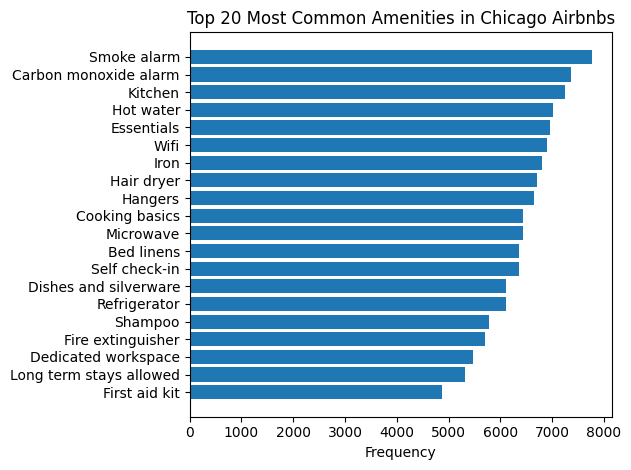

In [ ]:
#Get the top 20 most common amenities.
top20_amenities = amenitiesCounter.most_common(20)
amenities, counts = zip(*top20_amenities)

plt.barh(amenities, counts)
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Amenities in Chicago Airbnbs')
#In descending order.
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Look at accommodates --> Majority of listings can host up to 8 people.**

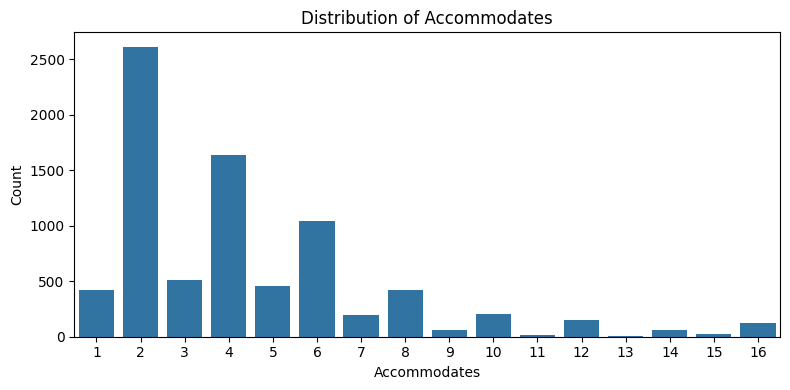

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=listings, x='accommodates')
plt.title('Distribution of Accommodates')
plt.ylabel('Count')
plt.xlabel('Accommodates')
plt.tight_layout()
plt.show()

### **Look at bedroom --> Majority of listings have less then 5 bedrooms. Certianly, 2 bedrooms are the most common.**

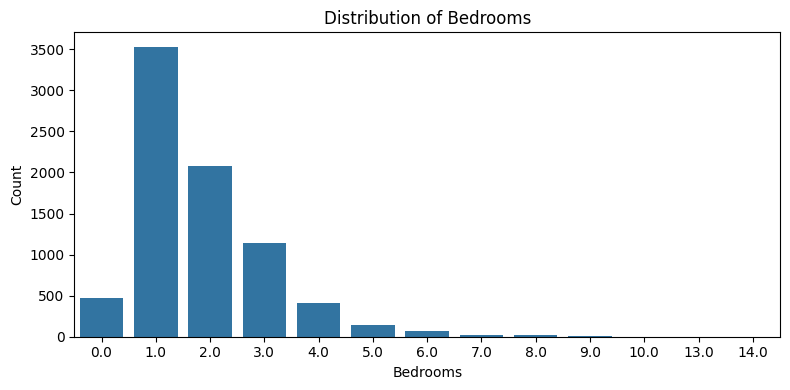

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=listings, x='bedrooms')
plt.title('Distribution of Bedrooms')
plt.ylabel('Count')
plt.xlabel('Bedrooms')
plt.tight_layout()
plt.show()

### **Look at bathrooms --> Majority of listings have 1-2 bathrooms.**

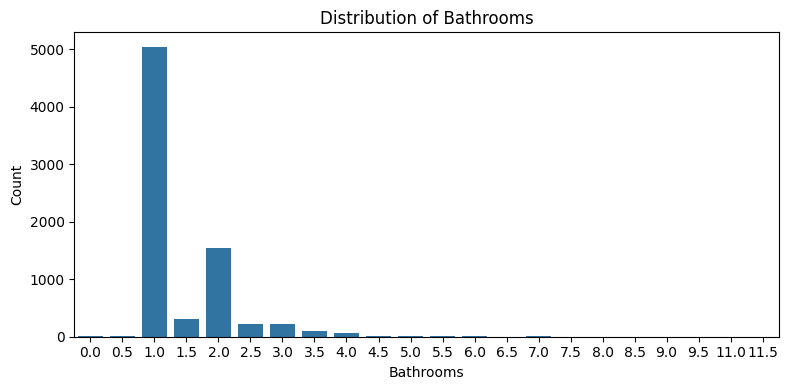

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=listings, x='bathrooms')
plt.title('Distribution of Bathrooms')
plt.ylabel('Count')
plt.xlabel('Bathrooms')
plt.tight_layout()
plt.show()

### **Distribution of Accommodates and Average Price by Room Type.**

*   77% of listings are entire home/apartment. Extremely small amount of shared room & hotel.



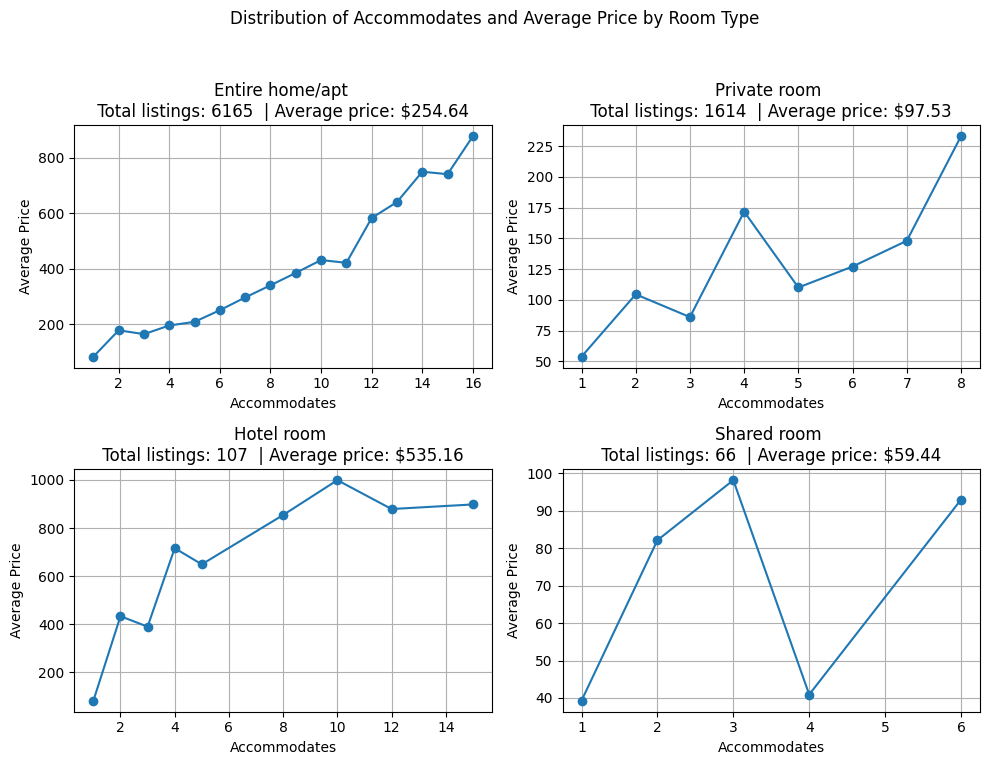

In [ ]:
unique_roomTypes = listings['room_type'].unique()
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of Accommodates and Average Price by Room Type')
axes = axes.flatten()

#Loop over each room type and plot the distribution of 'accommodates' with average 'price'.
for i, room_type in enumerate(unique_roomTypes):
  roomData = listings[listings['room_type'] == room_type]
  totalCount = roomData.shape[0]
  averagePrices = roomData['price'].mean()
  #Group by 'accommodates' and calculate the average 'price'.
  accommodatesPrice = roomData.groupby('accommodates')['price'].mean()

  axes[i].plot(accommodatesPrice.index, accommodatesPrice.values, marker='o', linestyle='-')
  axes[i].set_title(f"{room_type} \n Total listings: {totalCount}  | Average price: ${averagePrices:.2f} ")
  axes[i].set_xlabel('Accommodates')
  axes[i].set_ylabel('Average Price')
  axes[i].grid(True)

for j in range(i + 1, len(axes)):
  axes[j].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Look at price --> Majority of listings are less than $500.**

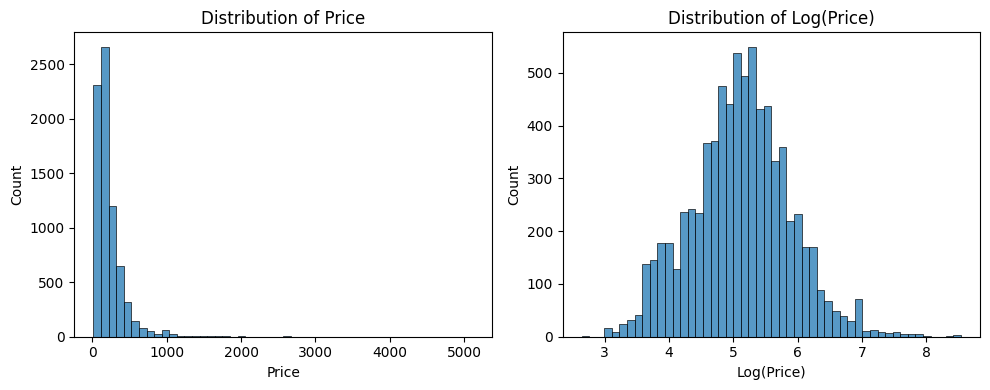

In [ ]:
#Apply log transformation to the price column.
listings['log_price'] = np.log1p(listings['price'])
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Plot original price distribution.
sns.histplot(data=listings, x='price', bins=50, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

#Plot log-transformed price distribution.
sns.histplot(data=listings, x='log_price', bins=50, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Log(Price)')
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### **Correlation Matrix.**

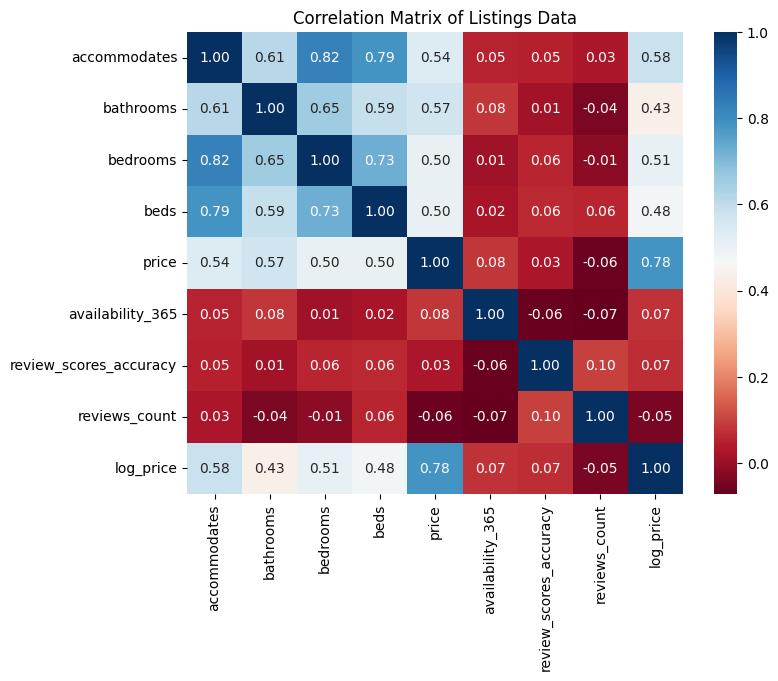

In [ ]:
#Select only the numerical columns in the DataFrame.
numericalColumns = listings.select_dtypes(include=['float64', 'int64'])
numericalColumns = numericalColumns.drop(['id', 'latitude', 'longitude'], axis=1)
correlationMatrix = numericalColumns.corr()

#Plot the correlation matrix as a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix of Listings Data')
plt.show()

### **Geospatial Map for listings distribution - Zoom ability --> Majority of listings are in Gold Coast and River North area.**

In [ ]:
#Create a GeoDataFrame from the listings data with coordinates (longitude and latitude).
geoListings = gpd.GeoDataFrame(listings, geometry=gpd.points_from_xy(listings.longitude, listings.latitude), crs="EPSG:4326")

#Load the neighborhood boundaries (GeoJSON or shapefile for Chicago).
mapBoundaries = gpd.read_file('neighbourhoods.geojson')

#Create a folium map centered around Chicago.
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)  # Centered on Chicago

#Add neighborhood boundaries to the map.
folium.GeoJson(mapBoundaries).add_to(m)

#Add all listings to the map using MarkerCluster for better visualization.
markerCluster = MarkerCluster().add_to(m)
for idx, row in geoListings.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=f"Price: ${row['price']}, Neighborhood: {row['neighbourhood_cleansed']}").add_to(markerCluster)
m.save("chicago_all_listings_map.html")
display(m)

Output hidden; open in https://colab.research.google.com to view.

### **Geospatial map for Airbnb room types --> Hotel listings are in downtown.**

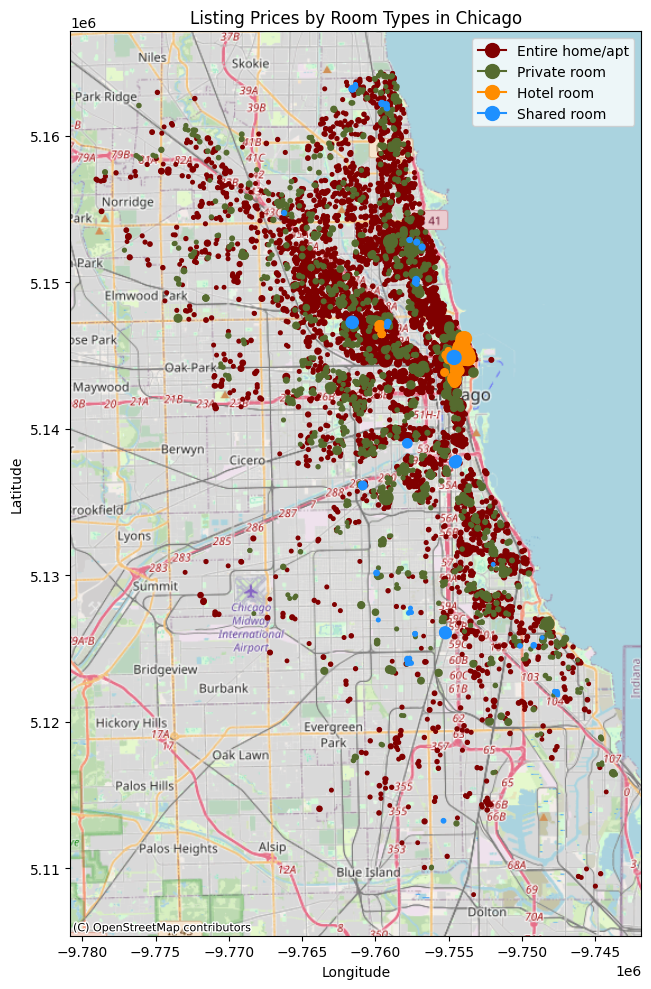

In [ ]:
#Convert both listings and neighborhood boundaries to EPSG:3857 (Web Mercator).
geoListings = geoListings.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
#Define colors for different room types.
room_typeColors = {'Entire home/apt': 'maroon', 'Private room': 'darkolivegreen', 'Hotel room': 'DarkOrange', 'Shared room': 'DodgerBlue'}

def normalizePrice(price, minSize=5, maxSize=100):
  '''Normalize function to scale marker sizes.'''
  scaledPrice = (price - price.min()) / (price.max() - price.min())
  return scaledPrice * (maxSize - minSize) + minSize

#Plot listings with 'Entire home/apt' room type.
entireHome = geoListings[geoListings['room_type'] == 'Entire home/apt']
entireHome.plot(ax=ax, color=room_typeColors['Entire home/apt'], marker='o', label='Entire home/apt',
                markersize=normalizePrice(entireHome['price']))

#Plot listings with 'Private room' room type.
privateRoom = geoListings[geoListings['room_type'] == 'Private room']
privateRoom.plot(ax=ax, color=room_typeColors['Private room'], marker='o', label='Private room',
                 markersize=normalizePrice(privateRoom['price']))

#Plot listings with 'Hotel room' room type.
hotelRoom = geoListings[geoListings['room_type'] == 'Hotel room']
hotelRoom.plot(ax=ax, color=room_typeColors['Hotel room'], marker='o', label='Hotel room',
               markersize=normalizePrice(hotelRoom['price']))

#Plot listings with 'Shared room' room type.
sharedRoom = geoListings[geoListings['room_type'] == 'Shared room']
sharedRoom.plot(ax=ax, color=room_typeColors['Shared room'], marker='o', label='Shared room',
                markersize=normalizePrice(sharedRoom['price']))

#Add a basemap using contextily.
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Listing Prices by Room Types in Chicago')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#Define the legend.
legendHandles = [mlines.Line2D([], [], color='maroon', marker='o', markersize=10, label='Entire home/apt'),
                mlines.Line2D([], [], color='darkolivegreen', marker='o', markersize=10, label='Private room'),
                mlines.Line2D([], [], color='DarkOrange', marker='o', markersize=10, label='Hotel room'),
                mlines.Line2D([], [], color='DodgerBlue', marker='o', markersize=10, label='Shared room')]
ax.legend(handles=legendHandles)
plt.tight_layout()
plt.show()

## **Write to a csv file.**

In [ ]:
listings.to_csv('listings_final.csv', index=False)

# **Reviews Dataset.**

In [ ]:
reviews = pd.read_csv("reviews.csv")
print (f"Reviews dataset shape: {reviews.shape}")
reviews['comments'] = reviews['comments'].astype(str)
#Special new line characters.
reviews['comments'] = reviews['comments'].str.replace('<br/>', '', regex=False).str.replace('\r', '', regex=False)

Reviews dataset shape: (417795, 6)


## **Clean Reviews dataset**

### **Filter English language comments.**

In [ ]:
def detectLanguage(text):
  '''Function to detect the language of a comment.'''
  try:
    return detect(text)
  except:
    return None

#Apply language detection to the 'comments' column.
reviews['language'] = reviews['comments'].apply(detectLanguage)

In [ ]:
reviews['detected_language'] = reviews['language'].apply(lambda x: x['lang'] if isinstance(x, dict) else None)
reviews = reviews[reviews['detected_language'] == 'en']
print (f"Reviews dataset shape: {reviews.shape}")

Reviews dataset shape: (404499, 8)


### **Weird comments.**

In [ ]:
#Define regex pattern for Chinese, Japanese, Korean characters and emojis.
pattern = (r'[\u4e00-\u9FFF\u3040-\u30FF\uAC00-\uD7A3]|'
           r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]|'
           r'[\u2600-\u26FF]')

#Replace non-Latin characters and emojis with an empty string in the 'comments' column.
reviews['comments'] = reviews['comments'].str.replace(pattern, '', regex=True)

In [ ]:
#Filter out rows where the comment length is <= 2, except when the comment is 'ok'.
#These comments are NA and emoji.
reviews = reviews[~(((reviews['comments'].str.len() <= 2) &
                     ~reviews['comments'].str.contains(r'^\s*(ok|no)[\.,!?]?\s*$', case=False, regex=True)) |
                    ((reviews['comments'].str.len() <= 3) &
                     ~reviews['comments'].str.contains(r'^\s*(hot|no|hey|yes|wow|bad|top|eh|ty|nah|yup|fun)[\.,!?]?\s*$', case=False, regex=True)))]
reviews = reviews.reset_index(drop=True)
print (f"Reviews dataset shape: {reviews.shape}")

Reviews dataset shape: (403291, 8)


In [ ]:
def weirdComment(comment):
  '''Function to check if a comment is not a full english word.'''
  if comment in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
    return True
  elif comment in ['N/a', 'Yy', '']:
    return True
  else: return False

#Identify rows with weird comments.
weirdComments = reviews[reviews['comments'].apply(weirdComment)]

In [ ]:
#Remove rows with weird comments from the original DataFrame.
filteredReviews = reviews[~reviews['comments'].apply(weirdComment)]
print (f"Reviews dataset shape: {filteredReviews.shape}")

Reviews dataset shape: (403291, 8)


In [ ]:
#Drop unnecessary columns.
filteredReviews = filteredReviews.drop(columns=['reviewer_id', 'reviewer_name', 'language', 'detected_language'])
print (f"Reviews dataset shape: {filteredReviews.shape}")
filteredReviews.head(2)

Reviews dataset shape: (403291, 4)


,listing_id,id,date,comments
0,2384,25218143,1/9/2015,it's a wonderful trip experience. I didn't exc...
1,2384,28475392,3/24/2015,This is my first trip using Airbnb. I was a li...


In [ ]:
#Get name and data type of each column.
filteredReviews.dtypes

,0
listing_id,int64
id,int64
date,object
comments,object


In [ ]:
#Only retain reviews of existing listings --> All match!
filteredReviews2 = filteredReviews[filteredReviews['listing_id'].isin(listings['id'])]
print (f"Reviews with filter dataset shape: {filteredReviews2.shape}")

Reviews with filter dataset shape: (403291, 4)


### **Get length of each comment.**

In [ ]:
filteredReviews2['reviews_length'] = filteredReviews2['comments'].apply(lambda x: len(x.split()))
filteredReviews2.head()

,listing_id,id,date,comments,reviews_length
0,2384,25218143,1/9/2015,it's a wonderful trip experience. I didn't exc...,46
1,2384,28475392,3/24/2015,This is my first trip using Airbnb. I was a li...,106
2,2384,31363208,5/4/2015,Rebecca was an absolutely wonderful host.I was...,243
3,2384,31820011,5/10/2015,Rebecca really tried to make it feel like home...,235
4,2384,33503451,5/29/2015,Hi. i just return from Chicago and want to sha...,77


In [ ]:
#Spot check.
specific_row = reviews[reviews['id'] == 31363208]
specific_row

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,detected_language
2,2384,31363208,5/4/2015,31293837,SuJung,Rebecca was an absolutely wonderful host.I was...,"{'lang': 'en', 'score': 0.9934571385383606}",en


In [ ]:
def tokenize (text):
  '''Tokenize text. Returning  list of string.'''

  #First clean up the text by replacing non-ascii characters to a space.
  text = re.sub(r"[^\x00-\x7F]+", " ", text)

  #1.Text to lowercase.
  text = text.lower()

  #2.Remove punctuations.
  text = re.sub(r'[^\w\s]', ' ', text)

  #3.Remove numbers.
  text = re.sub(r"\d+", ' ', text)

  #4.Separate words has '-' or '_' in between.
  text = re.sub(r'[_\-/]', ' ', text)

  #5.Tokenization
  tokens = word_tokenize(text)
  return tokens

In [ ]:
stopWord = stopwords.words('english')
def contentTokenize(data):
  '''Apply tokenizer to each text in 'comments' in pandas data frame.
  Store the results in a new column 'comments_tokenized'.'''

  contentTokenized = []

  #Iterate through each row of 'content' column.
  for text in data['comments']:
    #Tokenization.
    tokens = tokenize(text)
    filteredTokens = [token for token in tokens if token.lower() not in stopWord]
    contentTokenized.append(filteredTokens)
  #Add the tokenized content as a new column.
  data['comments_tokenized'] = contentTokenized
  return data

filteredReviews2 = contentTokenize(filteredReviews2)
filteredReviews2.head(4)

,listing_id,id,date,comments,reviews_length,comments_tokenized
0,2384,25218143,1/9/2015,it's a wonderful trip experience. I didn't exc...,46,"[wonderful, trip, experience, except, bedroom,..."
1,2384,28475392,3/24/2015,This is my first trip using Airbnb. I was a li...,106,"[first, trip, using, airbnb, little, nervous, ..."
2,2384,31363208,5/4/2015,Rebecca was an absolutely wonderful host.I was...,243,"[rebecca, absolutely, wonderful, host, travell..."
3,2384,31820011,5/10/2015,Rebecca really tried to make it feel like home...,235,"[rebecca, really, tried, make, feel, like, hom..."


## **Write to a csv file.**

In [ ]:
filteredReviews2.to_csv('reviews_final.csv', index=False)

# **CTA Dataset.**

In [ ]:
cta = pd.read_csv("CTA.csv")
print (f"CTA dataset shape: {cta.shape}")

CTA dataset shape: (302, 17)


In [ ]:
#Get name and data type of each column.
pd.set_option('display.max_columns', None)
cta.dtypes

,0
STOP_ID,int64
DIRECTION_ID,object
STOP_NAME,object
STATION_NAME,object
STATION_DESCRIPTIVE_NAME,object
MAP_ID,int64
ADA,bool
RED,bool
BLUE,bool
G,bool


## **Clean CTA Dataset.**

In [ ]:
#Drop unnecessary columns.
cta = cta.drop(columns=['STOP_ID', 'DIRECTION_ID', 'MAP_ID', 'ADA', 'RED', 'BLUE', 'G','BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O'])
print (f"CTA dataset shape: {cta.shape}")

CTA dataset shape: (302, 4)


### **Split location.**

In [ ]:
cta['Location'] = cta['Location'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
cta[['latitude', 'longitude']] = cta['Location'].apply(lambda x: pd.Series(x))

### **Drop duplicate entries --> Do not need direction.**

In [ ]:
cta = cta.drop_duplicates(subset='Location', keep='first')
print (f"CTA dataset shape: {cta.shape}")
cta.head(2)

CTA dataset shape: (145, 6)


,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,Location,latitude,longitude
0,Cicero (Loop-bound),Cicero,Cicero (Pink Line),"(41.85182, -87.745336)",41.851820,-87.745336
1,Central Park (Loop-bound),Central Park,Central Park (Pink Line),"(41.853839, -87.714842)",41.853839,-87.714842


## **Geospatial Map for train station distribution.**

In [ ]:
#Create a GeoDataFrame from the cta data with coordinates (longitude and latitude).
geoStations = gpd.GeoDataFrame(cta, geometry=gpd.points_from_xy(cta.longitude, cta.latitude), crs="EPSG:4326")

#Load the neighborhood boundaries (GeoJSON or shapefile for Chicago).
mapBoundaries = gpd.read_file('neighbourhoods.geojson')

#Create a folium map centered around Chicago.
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)  #Centered on Chicago.

#Add neighborhood boundaries to the map.
folium.GeoJson(mapBoundaries).add_to(m)

#Add all listings to the map using MarkerCluster for better visualization.
markerCluster = MarkerCluster().add_to(m)
for idx, row in geoStations.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=f"Station: {row['STATION_NAME']}").add_to(markerCluster)
m.save("chicago_train_stations_map.html")
display(m)

### **Station information.**

In [ ]:
def merged_stationInfo(row):
  '''Function to merge 'STOP_NAME' and 'STATION_DESCRIPTIVE_NAME' into a tuple.'''

  #Extract stop name before the first parenthesis.
  stop = row['STOP_NAME'].split(" (")[0]
  #Extract line inside parentheses, removing the last ')'
  lineColor = row['STATION_DESCRIPTIVE_NAME'].split(" (")[1][:-1]

  return (stop, lineColor)

cta['station_info'] = cta.apply(merged_stationInfo, axis=1)
cta = cta.drop(columns=['STOP_NAME', 'STATION_DESCRIPTIVE_NAME', 'STATION_NAME', 'Location'])

## **Write to a csv file.**

In [ ]:
cta.to_csv('cta_final.csv', index=False)

**Export this notebook to PDF file.**

In [5]:
!apt-get -qq install -y pandoc > /dev/null 2>&1
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert --to pdf "/content/drive/MyDrive/DSC 672/DSC672 - Exploratory.ipynb"  > /dev/null 2>&1